In [145]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data = pd.read_csv('beginning_sample.csv')

In [4]:
pickle.dump(data, open('db.pickle', 'wb'))

In [146]:
data = pickle.load(open('db.pickle', 'rb'))

In [147]:
data.subreddit.value_counts()

politics                1286712
The_Donald               817118
worldnews                585547
funny                    580616
news                     580117
gaming                   481149
pcgaming                  76677
ukpolitics                73542
AskReddit                 57124
Conservative              57087
newsokur                  36622
newsokunomoral            22682
AskScienceFiction         21489
pcmasterrace              16477
truegaming                15307
SandersForPresident       12097
willis7737_news           10242
worldpolitics             10234
videos                    10129
PoliticalDiscussion        9886
linux_gaming               9604
leagueoflegends            8344
todayilearned              8323
Overwatch                  8050
movies                     7860
gamingsuggestions          7766
buildapc                   7635
pics                       7059
nba                        6732
retrogaming                6449
                         ...   
Moes_Tav

In [148]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [149]:
sub_list = ['The_Donald']

data = data[data['subreddit'].isin(sub_list)]

In [150]:
data = data[['body','controversiality','gilded','score','subreddit']]

In [151]:
len(data)

817118

In [152]:
data = data[data['score']>50]

In [153]:
len(data)

26292

In [154]:
score_df = data.sort_values(by='score',ascending = False)

In [155]:
counter = 0
for row in score_df['body']:
    if row == '[deleted]':
        counter += 1
print(counter)

827


In [156]:
score_df = score_df[score_df['body'] != '[deleted]']

In [157]:
# score_df[len(score_df.body.str.split()) > 5]
for index in score_df.index.values:
    test = score_df.loc[index,'body'].split()
    print(len(test))

10
20
35
53
226
18
24
29
10
11
3
62
15
7
2
2
14
78
3
12
7
37
23
35
6
11
18
58
57
14
11
55
11
10
17
36
2
9
23
17
1
17
6
9
8
29
23
3
2
26
7
55
13
20
26
15
4
5
15
1
14
19
29
30
26
19
6
4
29
10
23
11
43
53
18
23
18
28
10
8
31
888
101
83
29
25
34
11
36
16
15
19
1
23
31
16
24
25
16
8
7
26
24
8
30
5
16
13
119
2
66
21
15
10
51
9
23
8
15
8
113
9
18
31
15
25
14
45
9
13
3
17
1
139
13
10
12
3
17
3
58
16
41
10
6
9
21
16
13
53
12
11
22
7
15
23
18
15
14
8
14
57
12
23
13
37
189
112
12
3
7
17
6
27
14
47
17
40
38
1
2
16
15
30
32
49
24
3
15
104
41
12
5
3
10
9
36
13
10
26
44
9
34
12
14
14
9
5
9
11
29
6
28
3
10
7
4
26
8
98
8
12
18
7
16
54
2
11
57
18
21
5
13
19
22
10
27
22
8
51
62
14
75
23
31
5
5
6
22
13
12
15
27
19
2
100
13
12
4
12
6
6
22
28
17
7
28
4
1
16
6
22
8
6
18
20
12
10
27
8
16
17
240
13
20
11
21
11
8
16
5
81
2
11
11
21
41
7
12
21
332
15
47
10
20
15
18
1
4
46
6
104
1
15
11
16
14
17
45
5
1
6
52
5
85
157
12
18
36
10
20
4
26
10
2
31
9
18
35
20
14
5
5
6
51
5
54
24
77
32
34
17
55
13
17
12
12
6
28
5
4
31


13
41
16
25
15
4
15
15
9
6
29
3
2
42
70
13
40
16
49
12
46
19
39
15
55
16
23
43
28
9
5
17
21
11
17
2
1
18
3
48
27
13
32
8
31
6
8
21
12
7
34
16
23
11
13
8
25
6
10
8
8
64
9
7
7
10
35
27
7
21
49
6
10
12
59
16
13
22
28
45
16
5
13
84
21
27
8
23
4
12
28
50
2
14
7
14
7
12
20
3
10
42
4
13
21
18
24
51
3
7
20
6
63
10
11
3
6
46
7
7
16
45
10
18
43
11
25
9
188
39
38
1
8
17
10
82
9
27
260
6
6
15
21
7
9
50
23
6
22
34
12
4
13
11
9
7
7
18
36
12
42
49
29
23
32
10
82
3
9
28
40
18
3
20
24
39
19
20
55
4
22
35
7
83
15
13
19
7
14
20
55
18
30
29
5
36
10
12
9
13
40
1
1
5
17
4
10
10
17
2
6
42
32
7
20
23
15
12
67
11
71
74
9
24
87
41
5
10
5
284
39
1
51
42
4
4
25
3
41
23
32
3
7
14
2
4
16
57
16
12
11
14
3
27
5
1
4
17
58
46
56
16
38
26
15
21
20
4
7
5
12
64
14
14
14
6
58
17
14
17
5
12
14
4
123
32
9
41
3
14
12
6
14
15
3
23
18
18
17
9
5
136
3
8
28
36
8
30
28
34
75
6
6
17
45
15
28
25
6
11
6
41
34
5
25
3
25
47
66
8
2
11
4
17
27
10
45
6
12
13
4
17
4
15
10
16
2
110
12
2
39
4
11
14
20
61
14
38
10
40
78
16
2
122
21
7
11
30
15

AttributeError: 'float' object has no attribute 'split'

In [158]:
score_df['body_length'] = score_df['body'].apply(lambda x: len(str(x).split(' ')))

In [159]:
score_df.head()

,body,controversiality,gilded,score,subreddit,body_length
1765548,did this idiot just issue a threat to the us,0,0,2921,The_Donald,10
3394114,#WE HAVE THE BEST FAGGOT MODERATORS DONT WE FO...,0,0,2128,The_Donald,19
745371,We've got six months to kill before the genera...,0,1,2033,The_Donald,36
2079651,"&gt; While running for US Senate, Hillary stop...",0,0,2000,The_Donald,48
4419057,I posted this in another thread but I'll post ...,0,1,1995,The_Donald,224


In [160]:
score_df = score_df[score_df['body_length'] >= 5]

In [161]:
len(score_df)

21823

In [162]:
sizifier = score_df.sample(n = 18469, random_state = 42)

In [163]:
score_df = sizifier

In [164]:
len(score_df)

18469

### Manipulation

In [165]:
score_df.head()

,body,controversiality,gilded,score,subreddit,body_length
4036313,I sure did a while ago. The situation in Europ...,0,0,80,The_Donald,117
3771746,screenname does not fit this claim,0,0,53,The_Donald,6
77153,Larry Wilcuck is a racist piece of shit and hi...,0,0,80,The_Donald,16
3057623,When she says stuff like this the Don should j...,0,0,291,The_Donald,43
543902,"He isn't even a threat, it's not like he could...",0,0,54,The_Donald,27


In [166]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(score_df['body']))

In [167]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [168]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.

trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

2019-08-22 09:34:31,656 : INFO : collecting all words and their counts
2019-08-22 09:34:31,657 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-08-22 09:34:32,058 : INFO : PROGRESS: at sentence #10000, processed 286386 words and 156579 word types
2019-08-22 09:34:32,390 : INFO : collected 246899 word types from a corpus of 526529 words (unigram + bigrams) and 18469 sentences
2019-08-22 09:34:32,391 : INFO : using 246899 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
/home/nick/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2019-08-22 09:34:32,396 : INFO : collecting all words and their counts
2019-08-22 09:34:32,397 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-08-22 09:34:34,075 : INFO : PROGRE

In [169]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [170]:
stop_words.extend(['http', 'https', 'imgur', 'com', 'jpg', 'bernie', 'hillary', 'trump', 'www', 'sander', 'sanders', 'clinton', 'donald', 'youtube', 'reddit', 'org'])

In [171]:
print(trigram[bigram[data_words[19]]])

['roger', 'stone', 'said', 'he', 'has', 'all', 'of', 'bill', 'victims', 'already', 'organized']


In [89]:
# !python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/nick/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/nick/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [172]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words_bigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['sure', 'situation', 'europe', 'unchecked', 'unfettered', 'illegal_immigration', 'respect', 'country', 'immigrate', 'change', 'bleed', 'heart', 'liberal', 'pretty', 'quickly', 'still', 'pretty', 'liberal', 'would', 'rather', 'right', 'drank', 'coolaid', 'long', 'time', 'ago', 'take', 'long', 'time', 'realize', 'mention', 'current', 'situation', 'venezuela', 'look', 'break', 'next', 'month', 'flock', 'america', 'course', 'panama', 'canal', 'pretty', 'effective', 'wall', 'already', 'need', 'mexico', 'border']]


In [173]:
pickle.dump(data_lemmatized, open('lem_td.pickle', 'wb'))

In [202]:
data_lemmatized2 = pickle.load(open('lem_td.pickle', 'rb'))

In [203]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized2)

# Create Corpus
texts = data_lemmatized2

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

2019-08-22 14:07:06,180 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-08-22 14:07:06,569 : INFO : adding document #10000 to Dictionary(14109 unique tokens: ['ago', 'already', 'america', 'bleed', 'border']...)
2019-08-22 14:07:06,778 : INFO : built Dictionary(18827 unique tokens: ['ago', 'already', 'america', 'bleed', 'border']...) from 18469 documents (total 250275 corpus positions)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)]]


In [204]:
#Readable version:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ago', 1),
  ('already', 1),
  ('america', 1),
  ('bleed', 1),
  ('border', 1),
  ('break', 1),
  ('canal', 1),
  ('change', 1),
  ('coolaid', 1),
  ('country', 1),
  ('course', 1),
  ('current', 1),
  ('drank', 1),
  ('effective', 1),
  ('europe', 1),
  ('flock', 1),
  ('heart', 1),
  ('illegal_immigration', 1),
  ('immigrate', 1),
  ('liberal', 2),
  ('long', 2),
  ('look', 1),
  ('mention', 1),
  ('mexico', 1),
  ('month', 1),
  ('need', 1),
  ('next', 1),
  ('panama', 1),
  ('pretty', 3),
  ('quickly', 1),
  ('rather', 1),
  ('realize', 1),
  ('respect', 1),
  ('right', 1),
  ('situation', 2),
  ('still', 1),
  ('sure', 1),
  ('take', 1),
  ('time', 2),
  ('unchecked', 1),
  ('unfettered', 1),
  ('venezuela', 1),
  ('wall', 1),
  ('would', 1)]]

In [178]:
score_df['processed_body'] = data_lemmatized2

In [179]:
score_df.head()

,body,controversiality,gilded,score,subreddit,body_length,processed_body
4036313,I sure did a while ago. The situation in Europ...,0,0,80,The_Donald,117,"[sure, situation, europe, unchecked, unfettere..."
3771746,screenname does not fit this claim,0,0,53,The_Donald,6,"[screenname, fit, claim]"
77153,Larry Wilcuck is a racist piece of shit and hi...,0,0,80,The_Donald,16,"[larry, wilcuck, racist, piece, shit, show, de..."
3057623,When she says stuff like this the Don should j...,0,0,291,The_Donald,43,"[say, stuff, hammer, send, email, wedding, rec..."
543902,"He isn't even a threat, it's not like he could...",0,0,54,The_Donald,27,"[even, threat, could, possibly, win, important..."


In [180]:
pickle.dump(score_df, open('score_df_td.pickle', 'wb'))

In [200]:
score_df = pickle.load(open('score_df_td.pickle', 'rb'))

In [201]:
score_df.head()

,body,controversiality,gilded,score,subreddit,body_length,processed_body
4036313,I sure did a while ago. The situation in Europ...,0,0,80,The_Donald,117,"[sure, situation, europe, unchecked, unfettere..."
3771746,screenname does not fit this claim,0,0,53,The_Donald,6,"[screenname, fit, claim]"
77153,Larry Wilcuck is a racist piece of shit and hi...,0,0,80,The_Donald,16,"[larry, wilcuck, racist, piece, shit, show, de..."
3057623,When she says stuff like this the Don should j...,0,0,291,The_Donald,43,"[say, stuff, hammer, send, email, wedding, rec..."
543902,"He isn't even a threat, it's not like he could...",0,0,54,The_Donald,27,"[even, threat, could, possibly, win, important..."


### Building the Topic Model

In [205]:
from gensim import corpora, models
lda_model = models.LdaMulticore(corpus, id2word=id2word, num_topics=8, workers=7)

2019-08-22 14:07:28,798 : INFO : using symmetric alpha at 0.125
2019-08-22 14:07:28,803 : INFO : using symmetric eta at 0.125
2019-08-22 14:07:28,822 : INFO : using serial LDA version on this node
2019-08-22 14:07:28,900 : INFO : running online LDA training, 8 topics, 1 passes over the supplied corpus of 18469 documents, updating every 14000 documents, evaluating every ~18469 documents, iterating 50x with a convergence threshold of 0.001000
2019-08-22 14:07:28,902 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-08-22 14:07:28,904 : INFO : training LDA model using 7 processes
2019-08-22 14:07:29,297 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/18469, outstanding queue size 1
2019-08-22 14:07:29,330 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/18469, outstanding queue size 2
2019-08-22 14:07:29,333 : INFO : PROGRESS: pass 0, dispatched chunk #2 = d

In [99]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

2019-08-21 23:33:15,200 : INFO : -8.581 per-word bound, 382.8 perplexity estimate based on a held-out corpus of 18469 documents with 250275 words



Perplexity:  -8.580588357765611


In [101]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized2, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-08-21 23:33:35,190 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2019-08-21 23:33:36,620 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,620 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,625 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,628 : INFO : accumulator serialized
2019-08-21 23:33:36,627 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,628 : INFO : accumulator serialized
2019-08-21 23:33:36,634 : INFO : accumulator serialized
2019-08-21 23:33:36,631 : INFO : accumulator serialized
2019-08-21 23:33:36,625 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,631 : INFO : serializing accumulator to return to master...
2019-08-21 23:33:36,687 : INFO : accumulator serialized
2019-08-21 23:33:36,684 : INFO : serializing accumulator to return to master...
2019-08-21 2


Coherence Score:  0.5612894269592551


### Visualization Topics

In [102]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [103]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/nick/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.004077  0.002311       1        1  15.488604
7     -0.006461 -0.002481       2        1  13.696687
9     -0.000731  0.009705       3        1  12.330137
3      0.012808  0.011200       4        1  12.191200
1      0.005281  0.002146       5        1  10.302779
6      0.004654  0.038653       6        1   8.279072
0      0.026504  0.010642       7        1   7.638047
2      0.008418  0.011499       8        1   7.084946
8      0.022673 -0.072011       9        1   6.873453
5     -0.077222 -0.011665      10        1   6.115072, topic_info=      Category         Freq                         Term        Total  \
38     Default  2514.000000                          get  2514.000000   
118    Default  1466.000000                        would  1466.000000   
36     Default  1545.000000                         fuck  1545.000000   
215    Default  2222.000000                       people  2222.000000   
796    Default   468.000000                        watch   468.000000   
62     Default  1906.000000                          say  1906.000000   
170    Default  1406.000000                        think  1406.000000   
219    Default   870.000000                         take   870.000000   
16     Default  2153.000000                           go  2153.000000   
529    Default   693.000000                         vote   693.000000   
56     Default  1213.000000                         want  1213.000000   
175    Default   813.000000                        woman   813.000000   
160    Default  1306.000000                         know  1306.000000   
487    Default   501.000000                        still   501.000000   
5862   Default   127.000000                         rekt   127.000000   
380    Default  1180.000000                          see  1180.000000   
11552  Default    78.000000                        pubme    78.000000   
667    Default   526.000000                          win   526.000000   
130    Default   534.000000                        could   534.000000   
97     Default   617.000000                       muslim   617.000000   
780    Default   279.000000                       sli_mg   279.000000   
16121  Default    61.000000    th_president_th_president    61.000000   
295    Default   857.000000                          man   857.000000   
171    Default   960.000000                         time   960.000000   
385    Default   468.000000                         year   468.000000   
43     Default   414.000000                         many   414.000000   
446    Default   542.000000                        white   542.000000   
3035   Default    47.000000  rapist_rapist_rapist_rapist    47.000000   
191    Default   436.000000                        first   436.000000   
224    Default   635.000000                          try   635.000000   
...        ...          ...                          ...          ...   
42     Topic10   109.566399                         make  1725.626953   
219    Topic10    71.215363                         take   870.202148   
62     Topic10   114.877296                          say  1906.104248   
358    Topic10    30.989826                        wrong   224.726532   
193    Topic10    39.239899                          job   342.710999   
78     Topic10    16.768740                        happy    84.041107   
349    Topic10    54.251034                          way   600.371277   
136    Topic10    53.156044                         much   610.817871   
747    Topic10    46.129780                     american   485.726654   
505    Topic10    36.528080                    literally   336.042053   
482    Topic10    32.995949                      already   286.143036   
148    Topic10    43.227287                      believe   459.711853   
359    Topic10    43.842628                         back   475.532806   
355    Topic10    57.697

### Mallet Model

In [182]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

2019-08-22 09:37:21,175 : INFO : serializing temporary corpus to /tmp/4a3fb0_corpus.txt
/home/nick/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-08-22 09:37:21,439 : INFO : converting temporary corpus to MALLET format with /home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/4a3fb0_corpus.txt --output /tmp/4a3fb0_corpus.mallet
2019-08-22 09:37:22,803 : INFO : training MALLET LDA with /home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet train-topics --input /tmp/4a3fb0_corpus.mallet --num-topics 8  --alpha 50 --optimize-interval 0 --num-threads 4 --output-s

In [183]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

2019-08-22 09:38:13,905 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows


[(0,
  [('government', 0.010790284983833371),
   ('gt', 0.009699977441912927),
   ('family', 0.008985638017896083),
   ('support', 0.008684863523573201),
   ('read', 0.00823370178208888),
   ('law', 0.00819610497029852),
   ('idea', 0.008045717723137079),
   ('kind', 0.007820136852394917),
   ('person', 0.0076321527934431165),
   ('find', 0.006955410181216633)]),
 (1,
  [('pay', 0.01668305969584626),
   ('money', 0.0160021184837709),
   ('job', 0.014110615116894909),
   ('work', 0.013278353635469472),
   ('year', 0.011954301278656276),
   ('state', 0.010592418854505561),
   ('part', 0.010024967844442763),
   ('people', 0.009987137777105243),
   ('change', 0.009608837103730044),
   ('news', 0.009268366497692367)]),
 (2,
  [('shit', 0.03478014414122601),
   ('thing', 0.021418738359381326),
   ('good', 0.01890841363673172),
   ('day', 0.018179609684994737),
   ('show', 0.017653251275406914),
   ('real', 0.01587173050449429),
   ('life', 0.015061948335897643),
   ('watch', 0.01449510081787

2019-08-22 09:38:14,986 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,985 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,983 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,990 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,991 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,994 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,993 : INFO : serializing accumulator to return to master...
2019-08-22 09:38:14,994 : INFO : accumulator serialized
2019-08-22 09:38:14,994 : INFO : accumulator serialized
2019-08-22 09:38:14,996 : INFO : accumulator serialized
2019-08-22 09:38:14,997 : INFO : accumulator serialized
2019-08-22 09:38:14,998 : INFO : accumulator serialized
2019-08-22 09:38:14,997 : INFO : accumulator serialized
2019-08-22 09:38:14,994 : INFO : accumulator serialized
2019-08-22 09:38:15,291 : INFO : 7 accumulators 


Coherence Score:  0.4214458282497012


In [185]:
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('government', 0.010790284983833371),
   ('gt', 0.009699977441912927),
   ('family', 0.008985638017896083),
   ('support', 0.008684863523573201),
   ('read', 0.00823370178208888),
   ('law', 0.00819610497029852),
   ('idea', 0.008045717723137079),
   ('kind', 0.007820136852394917),
   ('person', 0.0076321527934431165),
   ('find', 0.006955410181216633)]),
 (1,
  [('pay', 0.01668305969584626),
   ('money', 0.0160021184837709),
   ('job', 0.014110615116894909),
   ('work', 0.013278353635469472),
   ('year', 0.011954301278656276),
   ('state', 0.010592418854505561),
   ('part', 0.010024967844442763),
   ('people', 0.009987137777105243),
   ('change', 0.009608837103730044),
   ('news', 0.009268366497692367)]),
 (2,
  [('shit', 0.03478014414122601),
   ('thing', 0.021418738359381326),
   ('good', 0.01890841363673172),
   ('day', 0.018179609684994737),
   ('show', 0.017653251275406914),
   ('real', 0.01587173050449429),
   ('life', 0.015061948335897643),
   ('watch', 0.01449510081787

In [115]:
type(ldamallet)
# topic_df = pd.DataFrame(data=ldamallet)
# topic_df.head()

gensim.models.wrappers.ldamallet.LdaMallet

In [106]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [107]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)

2019-08-22 00:02:56,167 : INFO : serializing temporary corpus to /tmp/576768_corpus.txt
2019-08-22 00:02:56,611 : INFO : converting temporary corpus to MALLET format with /home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/576768_corpus.txt --output /tmp/576768_corpus.mallet
2019-08-22 00:02:58,630 : INFO : training MALLET LDA with /home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet train-topics --input /tmp/576768_corpus.mallet --num-topics 2  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /tmp/576768_state.mallet.gz --output-doc-topics /tmp/576768_doctopics.txt --output-topic-keys /tmp/576768_topickeys.txt --num-iterations 1000 --inferencer-filename /tmp/576768_inferencer.mallet --doc-topics-threshold 0.0
2019-08-22 00:03:54,135 : INFO : loading assigned topics from /tmp/576768_state.mallet.gz
2019-08-22 00:03:55,081 : INFO : using ParallelW

2019-08-22 00:06:56,476 : INFO : accumulator serialized
2019-08-22 00:06:56,481 : INFO : accumulator serialized
2019-08-22 00:06:56,601 : INFO : serializing accumulator to return to master...
2019-08-22 00:06:56,455 : INFO : accumulator serialized
2019-08-22 00:06:56,475 : INFO : accumulator serialized
2019-08-22 00:06:56,466 : INFO : accumulator serialized
2019-08-22 00:06:56,467 : INFO : accumulator serialized
2019-08-22 00:06:56,611 : INFO : accumulator serialized
2019-08-22 00:06:56,910 : INFO : 7 accumulators retrieved from output queue
2019-08-22 00:06:57,592 : INFO : accumulated word occurrence stats for 27760 virtual documents
2019-08-22 00:06:59,213 : INFO : serializing temporary corpus to /tmp/edce7b_corpus.txt
2019-08-22 00:06:59,567 : INFO : converting temporary corpus to MALLET format with /home/nick/Documents/metis/project_04_final/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /tmp/edce7b_corpus.txt --ou

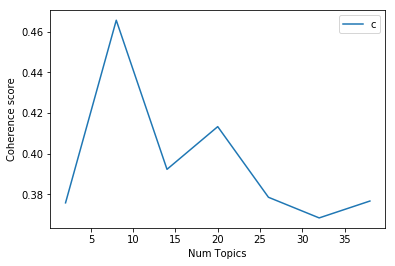

In [111]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Rerun LDA with Optimal Number of Topics

In [117]:
optimal_model = models.LdaMulticore(corpus, id2word=id2word, num_topics=8, workers=7)

2019-08-22 00:27:21,070 : INFO : using symmetric alpha at 0.125
2019-08-22 00:27:21,073 : INFO : using symmetric eta at 0.125
2019-08-22 00:27:21,092 : INFO : using serial LDA version on this node
2019-08-22 00:27:21,160 : INFO : running online LDA training, 8 topics, 1 passes over the supplied corpus of 18469 documents, updating every 14000 documents, evaluating every ~18469 documents, iterating 50x with a convergence threshold of 0.001000
2019-08-22 00:27:21,161 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-08-22 00:27:21,163 : INFO : training LDA model using 7 processes
2019-08-22 00:27:21,720 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/18469, outstanding queue size 1
2019-08-22 00:27:21,755 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/18469, outstanding queue size 2
2019-08-22 00:27:21,761 : INFO : PROGRESS: pass 0, dispatched chunk #2 = d

In [118]:
optimal_model.print_topics(num_words=10)

2019-08-22 00:28:58,201 : INFO : topic #0 (0.125): 0.013*"people" + 0.009*"fuck" + 0.009*"get" + 0.009*"say" + 0.008*"country" + 0.008*"make" + 0.007*"think" + 0.007*"go" + 0.006*"look" + 0.006*"want"
2019-08-22 00:28:58,206 : INFO : topic #1 (0.125): 0.010*"people" + 0.010*"know" + 0.008*"make" + 0.008*"say" + 0.008*"would" + 0.008*"get" + 0.007*"think" + 0.007*"right" + 0.006*"want" + 0.006*"go"
2019-08-22 00:28:58,211 : INFO : topic #2 (0.125): 0.011*"get" + 0.009*"go" + 0.008*"people" + 0.007*"time" + 0.007*"want" + 0.006*"try" + 0.006*"make" + 0.006*"know" + 0.006*"call" + 0.006*"fuck"
2019-08-22 00:28:58,216 : INFO : topic #3 (0.125): 0.016*"fuck" + 0.009*"think" + 0.008*"even" + 0.007*"get" + 0.007*"go" + 0.006*"say" + 0.006*"would" + 0.006*"see" + 0.006*"woman" + 0.006*"know"
2019-08-22 00:28:58,221 : INFO : topic #4 (0.125): 0.017*"go" + 0.009*"get" + 0.008*"make" + 0.006*"say" + 0.006*"would" + 0.005*"fuck" + 0.005*"man" + 0.005*"people" + 0.005*"win" + 0.004*"give"
2019-08-2

[(0,
  '0.013*"people" + 0.009*"fuck" + 0.009*"get" + 0.009*"say" + 0.008*"country" + 0.008*"make" + 0.007*"think" + 0.007*"go" + 0.006*"look" + 0.006*"want"'),
 (1,
  '0.010*"people" + 0.010*"know" + 0.008*"make" + 0.008*"say" + 0.008*"would" + 0.008*"get" + 0.007*"think" + 0.007*"right" + 0.006*"want" + 0.006*"go"'),
 (2,
  '0.011*"get" + 0.009*"go" + 0.008*"people" + 0.007*"time" + 0.007*"want" + 0.006*"try" + 0.006*"make" + 0.006*"know" + 0.006*"call" + 0.006*"fuck"'),
 (3,
  '0.016*"fuck" + 0.009*"think" + 0.008*"even" + 0.007*"get" + 0.007*"go" + 0.006*"say" + 0.006*"would" + 0.006*"see" + 0.006*"woman" + 0.006*"know"'),
 (4,
  '0.017*"go" + 0.009*"get" + 0.008*"make" + 0.006*"say" + 0.006*"would" + 0.005*"fuck" + 0.005*"man" + 0.005*"people" + 0.005*"win" + 0.004*"give"'),
 (5,
  '0.013*"people" + 0.013*"get" + 0.012*"say" + 0.010*"see" + 0.008*"go" + 0.008*"make" + 0.007*"vote" + 0.006*"good" + 0.006*"know" + 0.005*"would"'),
 (6,
  '0.008*"get" + 0.007*"even" + 0.007*"want" + 

In [120]:
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

/home/nick/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.007537 -0.007930       1        1  18.328037
1      0.003200 -0.014064       2        1  16.628336
7      0.018400  0.006730       3        1  12.804098
0      0.005972 -0.043339       4        1  11.729755
3      0.014575 -0.005857       5        1  11.594785
2      0.007749 -0.003365       6        1  10.772631
4      0.020066  0.057476       7        1   9.918530
6     -0.077500  0.010350       8        1   8.223829, topic_info=      Category         Freq                       Term        Total  loglift  \
36     Default  1536.000000                       fuck  1536.000000  30.0000   
16     Default  2128.000000                         go  2128.000000  29.0000   
56     Default  1199.000000                       want  1199.000000  28.0000   
380    Default  1189.000000                        see  1189.000000  27.0000   
94     Default  1055.000000                       even  1055.000000  26.0000   
93     Default   645.000000                    country   645.000000  25.0000   
868    Default   153.000000                     prison   153.000000  24.0000   
529    Default   715.000000                       vote   715.000000  23.0000   
170    Default  1411.000000                      think  1411.000000  22.0000   
90     Default   687.000000                       call   687.000000  21.0000   
175    Default   814.000000                      woman   814.000000  20.0000   
11552  Default    79.000000                      pubme    79.000000  19.0000   
556    Default   286.000000                       wall   286.000000  18.0000   
16121  Default    55.000000  th_president_th_president    55.000000  17.0000   
140    Default   815.000000                      right   815.000000  16.0000   
295    Default   844.000000                        man   844.000000  15.0000   
215    Default  2246.000000                     people  2246.000000  14.0000   
160    Default  1315.000000                       know  1315.000000  13.0000   
171    Default   963.000000                       time   963.000000  12.0000   
185    Default   394.000000                      money   394.000000  11.0000   
224    Default   630.000000                        try   630.000000  10.0000   
5862   Default   123.000000                       rekt   123.000000   9.0000   
92     Default   734.000000                       come   734.000000   8.0000   
1330   Default   487.000000                       post   487.000000   7.0000   
469    Default   499.000000                        let   499.000000   6.0000   
349    Default   598.000000                        way   598.000000   5.0000   
747    Default   487.000000                   american   487.000000   4.0000   
407    Default   816.000000                       look   816.000000   3.0000   
38     Default  2500.000000                        get  2500.000000   2.0000   
26     Default   195.000000                      thank   195.000000   1.0000   
...        ...          ...                        ...          ...      ...   
56      Topic8   149.814957                       want  1199.991455   0.4175   
544     Topic8    82.571274                    america   510.391602   0.6766   
861     Topic8    67.327400                         do   380.900146   0.7652   
747     Topic8    76.669350                   american   487.256287   0.6488   
550     Topic8    32.288616                     mexico   135.592041   1.0632   
674     Topic8    64.339882                       ever   390.318726   0.6954   
90      Topic8    90.187080                       call   687.499817   0.4670   
380     Topic8   127.080795                        see  1189.218750   0.2619   
175     Topic8    99.592621                      woman   814.688965   0.3964   
1022    Topic8    78.038864                   actually   584.074219   0.4853   
170     Topic8   131.196259                      think  1

### T-SNE

In [206]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    [topic_weights.append(w for i, w in row_list)]
#     topic_weights.append(row_list[0][1])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 8
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18357 samples in 0.018s...
[t-SNE] Computed neighbors for 18357 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18357
[t-SNE] Computed conditional probabilities for sample 2000 / 18357
[t-SNE] Computed conditional probabilities for sample 3000 / 18357
[t-SNE] Computed conditional probabilities for sample 4000 / 18357
[t-SNE] Computed conditional probabilities for sample 5000 / 18357
[t-SNE] Computed conditional probabilities for sample 6000 / 18357
[t-SNE] Computed conditional probabilities for sample 7000 / 18357
[t-SNE] Computed conditional probabilities for sample 8000 / 18357
[t-SNE] Computed conditional probabilities for sample 9000 / 18357
[t-SNE] Computed conditional probabilities for sample 10000 / 18357
[t-SNE] Computed conditional probabilities for sample 11000 / 18357
[t-SNE] Computed conditional probabilities for sample 12000 / 18357
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

In [199]:
show(plot)

In [196]:
len(mycolors[topic_num])
len(topic_num)

16351

In [187]:
print(mycolors)

color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'teal']
topic_list = ['']

['#1f77b4' '#ff7f0e' '#2ca02c' '#d62728' '#9467bd' '#8c564b' '#e377c2'
 '#7f7f7f' '#bcbd22' '#17becf']


In [184]:
ax.legend(loc='best')

NameError: name 'ax' is not defined

In [133]:
test_df = score_df.processed_body.replace('[]', np.nan)

test_df = score_df.processed_body.dropna()

In [138]:
test_df = test_df[test_df.str.len() != 0]

In [139]:
len(score_df)-len(test_df)

87

In [140]:
test_df.value_counts()

[comment, overwritten, automated_script]                                                                                                                                                                                                                                                                                                                                                                                                    13
[difference, make]                                                                                                                                                                                                                                                                                                                                                                                                                           9
[budget, ahead, schedule]                                                                                                                 

In [141]:
test_df.to_csv('the_donald.csv',index=False)

/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(36, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(38, 1), (56, 1)],
 [(16, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)],
 [(62, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(16, 1),
  (36, 1),
  (53, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(86, 1),
  (87

In [144]:
data.body.to_csv('the_donald.txt', index=False)

/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
